testing


- https://www.technologynetworks.com/informatics/articles/one-way-vs-two-way-anova-definition-differences-assumptions-and-hypotheses-306553

- https://pythonfordatascience.org/anova-python/

- https://www.youtube.com/watch?v=-yQb_ZJnFXw

- https://www.youtube.com/watch?v=zwr0bs8znEE

- larger F value means greater dispersion from the mean
- F = variation between sample means / variation within the samples
- https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-Northwind-Traders" data-toc-modified-id="Case-Study:-Northwind-Traders-1">Case Study: Northwind Traders</a></span><ul class="toc-item"><li><span><a href="#convert-sql-database-tables-into-pandas-dataframes" data-toc-modified-id="convert-sql-database-tables-into-pandas-dataframes-1.1">convert sql database tables into pandas dataframes</a></span><ul class="toc-item"><li><span><a href="#check-for-normality-in-the-experiment-and-control-samples" data-toc-modified-id="check-for-normality-in-the-experiment-and-control-samples-1.1.1">check for normality in the experiment and control samples</a></span></li></ul></li><li><span><a href="#Question-1:" data-toc-modified-id="Question-1:-1.2">Question 1:</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-1.3">Question 2</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Is-there-a-region-that-outperforms-the-others-in-terms-of-order-quantities?" data-toc-modified-id="Is-there-a-region-that-outperforms-the-others-in-terms-of-order-quantities?-1.3.0.1">Is there a region that outperforms the others in terms of order quantities?</a></span></li></ul></li><li><span><a href="#check-for-normality" data-toc-modified-id="check-for-normality-1.3.1">check for normality</a></span><ul class="toc-item"><li><span><a href="#stats-normaltest-confirms-the-distributions-are-not-normalLets-re-sample-to-gather-distribution-means-that-will-satisfy-normality-assumptions" data-toc-modified-id="stats-normaltest-confirms-the-distributions-are-not-normalLets-re-sample-to-gather-distribution-means-that-will-satisfy-normality-assumptions-1.3.1.1">stats normaltest confirms the distributions are not normal<br>Lets re-sample to gather distribution means that will satisfy normality assumptions</a></span></li></ul></li><li><span><a href="#combining-multiple-Series-into-a-DataFrame:-lessons-learned----the-Series-must-have-names-(see-example-above)and-you-must-specify-the-horizontal-axis" data-toc-modified-id="combining-multiple-Series-into-a-DataFrame:-lessons-learned----the-Series-must-have-names-(see-example-above)and-you-must-specify-the-horizontal-axis-1.3.2">combining multiple Series into a DataFrame: <br>lessons learned -- the Series must have names (see example above)<br>and you must specify the horizontal axis</a></span></li><li><span><a href="#need-to-run-ANOVA-here" data-toc-modified-id="need-to-run-ANOVA-here-1.3.3">need to run ANOVA here</a></span></li></ul></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-1.4">Question 3</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#are-there-any-salespeople-that-stand-out?" data-toc-modified-id="are-there-any-salespeople-that-stand-out?-1.4.0.1">are there any salespeople that stand out?</a></span></li></ul></li></ul></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-1.5">Question 4</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#are-there-any-categories-we-should-think-about-dicontinuing-or-expanding-on?" data-toc-modified-id="are-there-any-categories-we-should-think-about-dicontinuing-or-expanding-on?-1.5.0.1">are there any categories we should think about dicontinuing or expanding on?</a></span></li></ul></li></ul></li></ul></li></ul></div>

[link to cell in question](#link_to_cell_in_question)

[link to pd.melt](#link_to_pd.melt)


need to submit all docs and video on learn mod 2 final project

1. go back and test for normality of the samples we have
2. if not normal, do a resampling
(or can i do a kolmogorov smirov test?
3. check effect size



what do the metrics mean?  (on presentation)

for all questions -- dig "one level below the obvious"


sales ppl
-time period and how long at company

look at category per region


add key take-aways to slides 

does a t test make sense for all questions?

look at effect sizes (cohen D) 



# Case Study: Northwind Traders


Four questions to consider:<br>
1. Do discounted items sell in greater volume?  And if so, does the level of discount have an impact?
2. Do all regions perform equally in terms of quantities sold?
3. Are all salespeople created equal or do we have any under/over-performers?
4. Should we consider discontinuing any items and conversely, should we consider increasing market share in other categories?

## convert sql database tables into pandas dataframes


##### import packages and modules

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import scipy.stats as stats
from math import sqrt
import math
import copy
import statsmodels.api as sm             #for ANOVA
from statsmodels.formula.api import ols  #for ANOVA
from sklearn import preprocessing

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import session, sessionmaker
from sqlalchemy import inspect # so we can perform high level investigations


import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('seaborn')
from matplotlib import style

pd.set_option('display.max_columns', None)

##### creating an engine object and a session to connect and work with the Northwind sql db

In [2]:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo = True)
Session = sessionmaker(bind = engine)
session = Session
inspector = inspect(engine)

2019-05-17 16:03:58,994 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-05-17 16:03:58,999 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,001 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-05-17 16:03:59,002 INFO sqlalchemy.engine.base.Engine ()


##### lets have a look at the tables we will be working with and get to know them better

In [3]:
inspector.get_table_names()

2019-05-17 16:03:59,010 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-17 16:03:59,011 INFO sqlalchemy.engine.base.Engine ()


['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory']

##### For the first question, we only need Quantity and Discount though, I will map all tables since we will need them later

##### map the db table features with their headings

In [4]:
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base # creates a framework that clones the db structure so that it can generate a 
                                                  # a new model in which to map the db with its metadata, ie, column headings

In [5]:
metadata = MetaData()
metadata.reflect(engine)
Base = automap_base(metadata = metadata)
Base.prepare()



Category, Customer, CustomerCustomerDemo, CustomerDemographic, Employee, EmployeeTerritory, Order, OrderDetail,\
Product, Region, Shipper, Supplier, Territory = \
Base.classes.Category,\
Base.classes.Customer,\
Base.classes.CustomerCustomerDemo,\
Base.classes.CustomerDemographic, \
Base.classes.Employee, \
Base.classes.EmployeeTerritory,\
Base.classes.Order,\
Base.classes.OrderDetail, \
Base.classes.Product, \
Base.classes.Region,\
Base.classes.Shipper, \
Base.classes.Supplier, \
Base.classes.Territory

2019-05-17 16:03:59,046 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-05-17 16:03:59,047 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,049 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-05-17 16:03:59,050 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,053 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-05-17 16:03:59,054 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,056 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-05-17 16:03:59,057 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,058 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-05-17 16:03:59,058 INFO sqlalchemy.engine.base.Engin

##### converting each mapped table to a pandas dataframe

In [6]:
category_df= pd.read_sql_query("SELECT * FROM [category]", engine)
customer_df = pd.read_sql_query("SELECT * FROM [customer]", engine)
customerCustomerDemo_df = pd.read_sql_query("SELECT * FROM [customerCustomerDemo]", engine)
customerDemographic_df = pd.read_sql_query("SELECT * FROM [customerDemographic]", engine)
employee_df = pd.read_sql_query("SELECT * FROM [employee]", engine)
employeeTerritory_df = pd.read_sql_query("SELECT * FROM [employeeTerritory]", engine)
order_df = pd.read_sql_query("SELECT * FROM [order]", engine)
orderDetail_df = pd.read_sql_query("SELECT * FROM [orderDetail]", engine)
product_df = pd.read_sql_query("SELECT * FROM [product]", engine)
region_df = pd.read_sql_query("SELECT * FROM [region]", engine)
shipper_df = pd.read_sql_query("SELECT * FROM [shipper]", engine)
supplier_df = pd.read_sql_query("SELECT * FROM [supplier]", engine)
territory_df = pd.read_sql_query("SELECT * FROM [territory]", engine)

2019-05-17 16:03:59,338 INFO sqlalchemy.engine.base.Engine SELECT * FROM [category]
2019-05-17 16:03:59,339 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,345 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customer]
2019-05-17 16:03:59,346 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,357 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerCustomerDemo]
2019-05-17 16:03:59,359 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,365 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerDemographic]
2019-05-17 16:03:59,367 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,372 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employee]
2019-05-17 16:03:59,373 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,380 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employeeTerritory]
2019-05-17 16:03:59,381 INFO sqlalchemy.engine.base.Engine ()
2019-05-17 16:03:59,387 INFO sqlalchemy.engine.base.Engine SELECT * FROM [order]
2019-05-17 

##### For question one, we need Quantity and Discount features, which are in the Order Detail table

In [7]:
orderDetail_df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


create a new instance of the data we need instead of a pointer

In [8]:
q1df = copy.deepcopy(orderDetail_df[["Quantity", "Discount"]])
q1df.head()

,Quantity,Discount
0,12,0.0
1,10,0.0
2,5,0.0
3,9,0.0
4,40,0.0


In [9]:
q1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
Quantity    2155 non-null int64
Discount    2155 non-null float64
dtypes: float64(1), int64(1)
memory usage: 33.8 KB


no need to change data types

In [10]:
q1df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

##### remove irrelevant discount levels based on the extremely low number of observations

In [11]:
q1df = copy.deepcopy(q1df[q1df.Discount.isin([ 0.05, 0.10, 0.20, 0.15, 0.25, 0.00])])

##### must split discount column into two groups; one for those with and another without a discount

In [12]:
q1_wDis = q1df[q1df.Discount > 0.0]
q1_woDis = q1df[q1df.Discount == 0.0]
q1_woDis.Discount.value_counts()

0.0    1317
Name: Discount, dtype: int64

In [13]:
wDisAvg = q1_wDis['Quantity'].mean()
wDisAvg

27.35421686746988

In [14]:
wOdisAvg = q1_woDis['Quantity'].mean()
wOdisAvg

21.715261958997722

In [15]:
print(q1_wDis.Quantity.mean())
print(q1_woDis.Quantity.mean())

27.35421686746988
21.715261958997722


In [16]:
q1_wDis.head()

,Quantity,Discount
6,35,0.15
7,15,0.15
8,6,0.05
9,15,0.05
11,40,0.05


### check for normality in the experiment and control samples

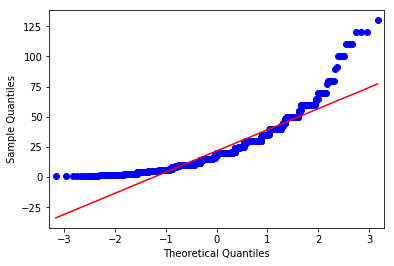

In [17]:
from statsmodels.graphics.gofplots import qqplot

wo_dis = qqplot(q1_woDis.Quantity, line = 's')

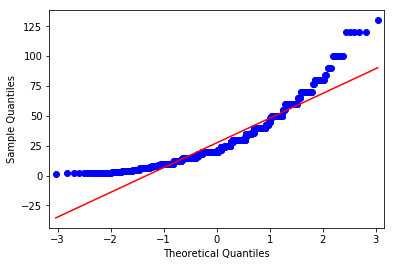

In [18]:

w_dis=qqplot(q1_wDis.Quantity, line = 's')

##### The Quanitle Quantile (QQ) plots above for the experiment and control group show a large deviation from the ideal normal distribution (the straight line). 

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


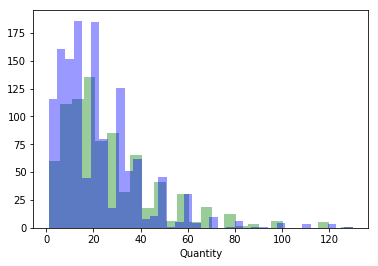

In [19]:
# kde turned off so we see actual frequency instead of normalized frequency

sns.distplot(q1_wDis.Quantity, kde = False, color = 'g')
sns.distplot(q1_woDis.Quantity, kde = False, color = 'b')

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


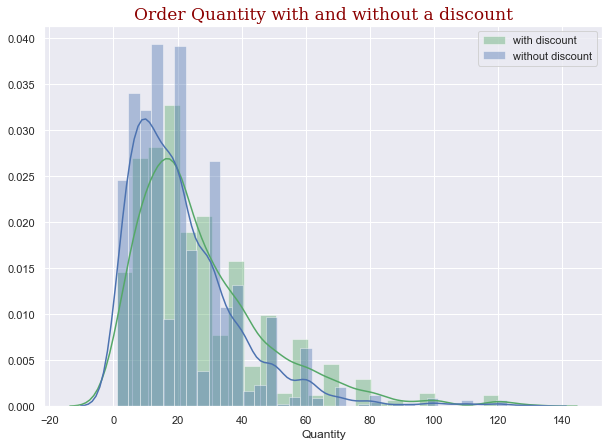

In [20]:
#plt.style.use("dark_background")
#sns.set_color_codes("bright")
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(q1_wDis.Quantity, color = "g", label = "with discount", norm_hist = False) 
sns.distplot(q1_woDis.Quantity, color = "b", label = "without discount", norm_hist = False) 

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 17,
        }

plt.title("Order Quantity with and without a discount", fontdict=font)
plt.legend()

##### lets use the stats normaltest function to perform a D'Agostino K**2 test to look at skew (asymmetry) and kurtosis(magnitude of observations present in a tail) 

In [21]:
print(stats.normaltest(q1_wDis.Quantity))
print(stats.normaltest(q1_woDis.Quantity))

NormaltestResult(statistic=261.04626710761113, pvalue=2.0631145260149106e-57)
NormaltestResult(statistic=544.5770045551502, pvalue=5.579637380545965e-119)


##### P-value for both sets is smaller than alpha so we reject the null that distribution is normal. <br> Now lets focus on getting our samples to fit a normal distribution<br>we will use the property of the Central Limit Theorem and sampling distribution of the mean

In [22]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

def create_sample_distribution(data, dist_size=2000, n=500):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = sum(sample) / len(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

control_sample1 = create_sample_distribution(q1_woDis.Quantity)
experiment_sample1 = create_sample_distribution(q1_wDis.Quantity)


##### now lets visually inspect the distribution of sample means for the control and experiment groups

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


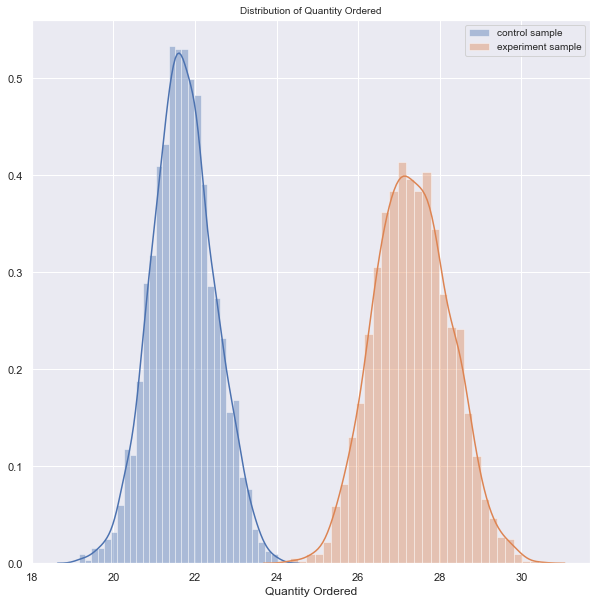

In [23]:
plt.figure(figsize = (10,10))
sns.distplot(control_sample1, label = "control sample")
sns.distplot(experiment_sample1, label = "experiment sample")
plt.title("Distribution of Quantity Ordered", fontsize= 10)
plt.xlabel("Quantity Ordered")
plt.legend(fontsize = 10)

In [24]:
print(stats.normaltest(control_sample1))
print(stats.normaltest(experiment_sample1))

NormaltestResult(statistic=0.40123597658761817, pvalue=0.8182249433651367)
NormaltestResult(statistic=6.678645171224689, pvalue=0.035460971359287524)


##### running a normal test on the new data we see we fail to reject the null that the distributions are normal <br> Our data now satisfies the normality so we can work with it. 

## Question 1: 
##### is there a difference in quantity ordered between no discount and having a discount?

$H_O$: There is no difference in the average quantity ordered between product having and not having a discount<br>
$H_a$: Products having a discount are ordered in greater quantities compared to those not having a discount<br>

this is a one tail test

lets get our t statistic and p value

In [25]:
stats.ttest_ind(experiment_sample1, control_sample1, equal_var = False)

Ttest_indResult(statistic=209.66855217051634, pvalue=0.0)

##### Conclusion part 1a<br>
our t value tells us we have a significant difference in sample mean with T stat of 206 thats greater than the critical value of 1.646 and the p value tells us there is a very small probability the result is by chance so, we have evidence to reject the null hypothesis and accept the alternative, i.e., we have sufficient evidence to assert that discounts do have a statistically significant effect on order quantities. 

for the next part of the question, we will dig a bit deeper to determine if there is a certain level of discount that precipitates an increase in order size, or not

will separate/bin the discount levels so we can compare each experiment group to the control

C:\Users\mngav\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


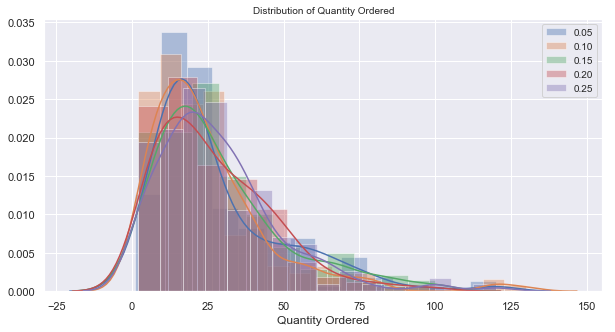

In [26]:
q1_wDis

plt.figure(figsize = (10,5))
sns.distplot(q1_wDis['Quantity'][q1_wDis['Discount']==0.05], label = "0.05")
sns.distplot(q1_wDis['Quantity'][q1_wDis['Discount']==0.10], label = "0.10")
sns.distplot(q1_wDis['Quantity'][q1_wDis['Discount']==0.15], label = "0.15")
sns.distplot(q1_wDis['Quantity'][q1_wDis['Discount']==0.20], label = "0.20")
sns.distplot(q1_wDis['Quantity'][q1_wDis['Discount']==0.25], label = "0.25")



plt.title("Distribution of Quantity Ordered", fontsize= 10)
plt.xlabel("Quantity Ordered")
plt.legend(fontsize = 10)

In [27]:
q1a_feature_regions = [q1_wDis['Quantity'][q1_wDis['Discount']==.05], q1_wDis['Quantity'][q1_wDis['Discount']==.10], q1_wDis['Quantity'][q1_wDis['Discount']==.15], 
                       q1_wDis['Quantity'][q1_wDis['Discount']==.20], q1_wDis['Quantity'][q1_wDis['Discount']==.25]]


for i in q1a_feature_regions:
    print(stats.normaltest(i))

NormaltestResult(statistic=63.84242740591745, pvalue=1.3702286160643066e-14)
NormaltestResult(statistic=98.50271035413209, pvalue=4.0776337983848464e-22)
NormaltestResult(statistic=38.52550343019272, pvalue=4.308173885400061e-09)
NormaltestResult(statistic=31.398997154435623, pvalue=1.519827852850104e-07)
NormaltestResult(statistic=54.44887806745976, pvalue=1.5016763972075847e-12)


In [28]:
levels = [df_00.Quantity,df_05.Quantity, df_10.Quantity, df_15.Quantity, df_20.Quantity, df_25.Quantity]

NameError: name 'df_00' is not defined

In [ ]:
norm_00 = create_sample_distribution(df_00.Quantity, dist_size=1000, n=1000)
norm_05 = create_sample_distribution(df_05.Quantity, dist_size=1000, n=1000)
norm_10 = create_sample_distribution(df_10.Quantity, dist_size=1000, n=1000)
norm_15 = create_sample_distribution(df_15.Quantity, dist_size=1000, n=1000)
norm_20 = create_sample_distribution(df_20.Quantity, dist_size=1000, n=1000)
norm_25 = create_sample_distribution(df_25.Quantity, dist_size=1000, n=1000)

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(norm_00, label = "00")
sns.distplot(norm_05, label = "05")
sns.distplot(norm_10, label = "10")
sns.distplot(norm_15, label = "15")
sns.distplot(norm_20, label = "20")
sns.distplot(norm_25, label = "25")

plt.title("Distribution of Quantity Ordered", fontsize= 10)
plt.xlabel("Quantity Ordered")
plt.legend(fontsize = 10)

In [ ]:
norm_levels = [norm_00, norm_05, norm_10, norm_15, norm_20, norm_25]

for level in norm_levels:
    print(stats.normaltest(level))

In [ ]:
norm_05=pd.Series( norm_05, name= 'norm_05')
norm_10=pd.Series( norm_10, name= 'norm_10')
norm_15=pd.Series( norm_15, name= 'norm_15')
norm_20=pd.Series( norm_20, name= 'norm_20')
norm_25=pd.Series(norm_25, name= 'norm_25')

norm_dis_df = pd.DataFrame(pd.concat([norm_05, norm_10, norm_15, norm_20, norm_25], axis = 1))

norm_discount_melted_df = pd.melt(norm_dis_df)
norm_discount_melted_df.rename(columns = {'variable': 'Discount', 'value': 'Quantity'}, inplace=True)
norm_discount_melted_df = pd.get_dummies(norm_discount_melted_df, columns = ["Discount"])
norm_discount_melted_df.tail(5)

In [ ]:
norm_discount_melted_df.info()

In [29]:
formula = 'Quantity ~ C(Discount_norm_05) + C(Discount_norm_10) + C(Discount_norm_15) + C(Discount_norm_20) + C(Discount_norm_25)'
           
lm = ols(formula, norm_discount_melted_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

NameError: name 'norm_discount_melted_df' is not defined

##### Above, our P-values support the alternative hypothesis, that the average quantities sold for having a discount versus not having a discount are not equal, except for the 10% discount level where we cannot reject the null.  So, the distribution for quantity sold at a 10% discount is not dissimilar from not having a discount.

In [ ]:
graph2 = pd.DataFrame([3.7, 2.1, 3.8, 3.4, 3.8]) 
graph2.columns =  ["Standard_Deviations_greater_than_mean"]
graph2['Discount_Level'] = [.05, .10, .15, .20, .25]
graph2.head()

In [ ]:

plt.style.use('ggplot')
width = .25
ax = sns.barplot(x= "Discount_Level", y="Standard_Deviations_greater_than_mean", data=graph2)

##### Conclusion part 1b<br>

**Restate the question and hypotheses:**<br>
is there a difference is quantity ordered between no discount and having a discount?<br>
𝐻𝑂: There is no difference in the average quantity ordered between product having and not having a discount<br>
𝐻𝑎: Products having a discount are ordered at greater quantities compared to those not having a discount<br>


We can see that all levels of discount have a significant effect on the quantity of orders though, a 10% discount has a lesser effect compared to the others which are more in line with each other.  <br>
Since there is not much of a difference in the magnitude of effect by the varying discount levels (excluding 10%), it makes sense to use the 5% level in our marketing campaigns since it will produce the same effect in moving product compared to the  highest discount, with the benefit of not having to buy as much demand.

## Question 2 
#### Is there a region that outperforms the others in terms of order quantities?

$H_O$: each region sells the same quantities of product<br>
$H_a$: regions do not sell the same quantities of product<br>

this is a two tailed test

We will need features from other tables so below, we merge all relevant tables after renaming a few features so we are sure to have at least one matching column on which to join on

In [ ]:
category_df.rename(columns = {"Id":"CategoryId"}, inplace = True)
cat_prod_df = pd.merge(category_df, product_df, on = "CategoryId" )
cat_prod_df.rename(columns = {"Id": "ProductId"}, inplace = True)
cat_prod_OrDtl_df = pd.merge(cat_prod_df, orderDetail_df, on = "ProductId")
order_df.rename(columns = {"Id" : "OrderId"}, inplace = True)
cat_prod_OrDtl_orders_df = pd.merge(cat_prod_OrDtl_df, order_df, on = "OrderId" )
customer_df.rename(columns ={"Id": "CustomerId"}, inplace = True)
data = pd.merge(cat_prod_OrDtl_orders_df, customer_df, on = "CustomerId")
data.head(2)

In [ ]:
data.info()

Lets isolate Region and Quantity so we can answer our second question

In [ ]:
q2df = data[["Region", "Quantity"]]
q2df.head()
q2df.Region.value_counts()

In [ ]:
q2df.head(15)

In [ ]:
q2df.groupby("Region").mean()

In [ ]:
regions = q2df.Region.unique()
np.sort(regions)

### check for normality

In [ ]:
BI = q2df[q2df.Region == "British Isles"]
CA = q2df[q2df.Region == "Central America"]
EE = q2df[q2df.Region == "Eastern Europe"]
NA = q2df[q2df.Region == "North America"]
NE = q2df[q2df.Region == "Northern Europe"]
S = q2df[q2df.Region == "Scandinavia"]
SA = q2df[q2df.Region == "South America"]
SE = q2df[q2df.Region == "Southern Europe"]
WE = q2df[q2df.Region == "Western Europe"]

In [ ]:
type(BI)

In [ ]:
BI.head()

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(BI.Quantity, label = "BI")
sns.distplot(CA.Quantity, label = "CA")
sns.distplot(EE.Quantity, label = "EE")
sns.distplot(NA.Quantity, label = "NA")
sns.distplot(NE.Quantity, label = "NE")
sns.distplot(S.Quantity, label = "S")
sns.distplot(SA.Quantity, label = "SA")
sns.distplot(SE.Quantity, label = "SE")
sns.distplot(WE.Quantity, label = "WE")

plt.title("Distribution of Quantity Ordered", fontsize= 10)
plt.xlabel("Quantity Ordered")
plt.legend(fontsize = 10)

##### Distributions of order quantities by Region to not appear to be Gaussian.  

In [ ]:
q2df.Region.value_counts()

In [ ]:
for i in [BI, CA, EE, NA, NE, S, SA, SE, WE]:
    print(stats.normaltest(i.Quantity))

#### stats normaltest confirms the distributions are not normal<br>Lets re-sample to gather distribution means that will satisfy normality assumptions

In [ ]:
#resample data for each region

norm_BI = create_sample_distribution(BI.Quantity, dist_size=40, n=5)
norm_CA = create_sample_distribution(CA.Quantity, dist_size=40, n=5)
norm_EE = create_sample_distribution(EE.Quantity, dist_size=40, n=5)
norm_NA = create_sample_distribution(NA.Quantity, dist_size=40, n=5)
norm_NE = create_sample_distribution(NE.Quantity, dist_size=40, n=5)
norm_S = create_sample_distribution(S.Quantity, dist_size=40, n=5)
norm_SA = create_sample_distribution(SA.Quantity, dist_size=40, n=5)
norm_SE = create_sample_distribution(SE.Quantity, dist_size=40, n=5)
norm_WE = create_sample_distribution(WE.Quantity, dist_size=40, n=5)


In [ ]:
type(norm_BI)

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(norm_BI, label = "BI")
sns.distplot(norm_CA, label = "CA")
sns.distplot(norm_EE, label = "EE")
sns.distplot(norm_NA, label = "NA")
sns.distplot(norm_NE, label = "NE")
sns.distplot(norm_S, label = "S")
sns.distplot(norm_SA, label = "SA")
sns.distplot(norm_SE, label = "SE")
sns.distplot(norm_WE, label = "WE")

plt.title("Distribution of Quantity Ordered", fontsize= 10)
plt.xlabel("Quantity Ordered")
plt.legend(fontsize = 10)

In [ ]:
for i in [norm_BI, norm_CA, norm_EE, norm_NA, norm_NE, norm_S, norm_SA, norm_SE, norm_WE]:
    print(stats.normaltest(i))

In [ ]:
norm_BI=pd.Series(norm_BI, name= 'norm_BI')
norm_CA=pd.Series( norm_CA, name= 'norm_CA')
norm_EE=pd.Series( norm_EE, name= 'norm_EE')
norm_NA=pd.Series( norm_NA, name= 'norm_NA')
norm_NE=pd.Series( norm_NE, name= 'norm_NE')
norm_S=pd.Series( norm_S, name=  'norm_S')
norm_SA=pd.Series( norm_SA, name= 'norm_SA')
norm_SE=pd.Series( norm_SE, name= 'norm_SE')
norm_WE=pd.Series( norm_WE, name= 'norm_WE')


### combining multiple Series into a DataFrame: <br>lessons learned -- the Series must have names (see example above)<br>and you must specify the horizontal axis



In [ ]:
regions_df = pd.DataFrame(pd.concat([norm_BI, norm_CA, norm_EE, norm_NA, norm_NE, norm_S, norm_SA, norm_SE, norm_WE], 
                                   axis = 1))

<a id='link_to_cell_in_question'></a>


### need to run ANOVA here

In [ ]:
regions_df.head()

In [ ]:
norm_regions_df = copy.deepcopy(regions_df)
norm_regions_df.head()

link to pd.melt

<a id='link_to_pd.melt'></a>

In [ ]:
q2_transformed_df = pd.melt(norm_regions_df)

In [ ]:
q2_transformed_df.rename( columns = {"value":"Quantity", "variable":"Region"}, inplace = True)
q2_transformed_df.head()

In [ ]:
q2_transformed_df = pd.get_dummies(q2_transformed_df, columns = ["Region"])


In [ ]:
q2_transformed_df.head()

##### Lets use an ANOVA test to compare the different groups with the control

In [ ]:
formula = "Quantity ~ Region_norm_BI + Region_norm_CA + Region_norm_EE + Region_norm_NA + Region_norm_NE + Region_norm_S \
            + Region_norm_SA + Region_norm_SE + Region_norm_WE"
           
lm = ols(formula, q2_transformed_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)


| Region          	| Code 	|
|-----------------	|------	|
| Western Europe  	| WE    	|
| North America   	| NA   	|
| South America   	| SA   	|
| British Isles   	| BI   	|
| Northern Europe 	| NE   	|
| Southern Europe 	| SE   	|
| Scandinavia     	| S   	|
| Central America 	| CA    	|
| Eastern Europe  	| EE   	|

##### Conclusion Question 2 <br>
**restate the question and hypotheses:**<br>
 Is there a region that outperforms the others in terms of order quantities?<br>
𝐻𝑂: each region sells the same quantities of product<br>
𝐻𝑎: regions do not sell the same quantities of product<br>

From the above ANOVA table, we see that we have significant events for all regions and that Western Europe has the greatest variability from the average for all regions.


## Question 3
#### are there any salespeople that stand out?

$H_O$: all sales peoples performance are identical <br>
$H_a$: some sales people do better than others and some do worse<br>

this is a two tailed test

pull the features we need into a dataframe

In [ ]:
q3df.EmployeeId.value_counts

we can use all the data here

EmployeeId is already numeric so, can skip label encoding and go straight to get dummies

Check each group in the feature for normality

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==1], label = "emp1")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==2], label = "emp2")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==3], label = "emp3")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==4], label = "emp4")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==5], label = "emp5")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==6], label = "emp6")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==7], label = "emp7")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==8], label = "emp8")
sns.distplot(q3df['Quantity'][q3df['EmployeeId']==9], label = "emp9")


plt.title("Distribution of Quantity Ordered", fontsize= 10)
plt.xlabel("Quantity Ordered")
plt.legend(fontsize = 10)

In [ ]:
q3_feature_regions = [q3df['Quantity'][q3df['EmployeeId']==1], q3df['Quantity'][q3df['EmployeeId']==2], q3df['Quantity'][q3df['EmployeeId']==3], q3df['Quantity'][q3df['EmployeeId']==4],
                      q3df['Quantity'][q3df['EmployeeId']==5], q3df['Quantity'][q3df['EmployeeId']==6], q3df['Quantity'][q3df['EmployeeId']==7], q3df['Quantity'][q3df['EmployeeId']==8],
                      q3df['Quantity'][q3df['EmployeeId']==9]]


In [ ]:
for i in q3_feature_regions:
    print(stats.normaltest(i))

the histogram and stats normal test confirm the data is normal and there is no need to transform

In [ ]:
q3df = (pd.get_dummies(q3df, columns = ["EmployeeId"])) # one-hot-encode

In [ ]:
q3df.head(2)

In [ ]:
formula = "Quantity ~ C(EmployeeId_1) + C(EmployeeId_2) + C(EmployeeId_3) + C(EmployeeId_4) + C(EmployeeId_5) + C(EmployeeId_6)\
+ C(EmployeeId_7) + C(EmployeeId_8) + C(EmployeeId_9)"
           
lm = ols(formula, q3df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

In [ ]:
q3table = pd.DataFrame(['Emp1', 'Emp2', 'Emp3', 'Emp4', 'Emp5', 'Emp6', 'Emp7', 'Emp8', 'Emp9'])
q3table.columns = ["Employee"]
q3table["Performance Vs Mean"] = [1, 8.6, 7, 3.25, 4.8, 0.5, 17.6, 0.6, 3.5]
q3table.head()

In [ ]:
sns.set(rc={'figure.figsize':(16,8.27)})
plt.style.use('ggplot')

ax = sns.barplot(x= "Employee", y="Performance Vs Mean", data=q3table)

##### Conclusion Question 3 <br> 

**Restate the question and hypotheses:**<br>
 are there any salespeople that stand out?<br>
 
𝐻𝑂: all sales peoples performance are identical <br>
𝐻𝑎: some sales people do better than others and some do worse<br>

We don't have sufficient evidence to say anything about employees 1, 4, 6 or 8. 
We do have significant events for employees 2, 3, 5, 7 and 9.  

Employee seven looks like a superstar on paper but we need to dig deeper to make sure it is her work that is creating the success and not some kind of 'gift' such as being the only salesperson in a region that needs several, or stable and high-growth company she has been relying on, ie, can this person reproduce the results anywhere?  maybe they can distribute some wisdom to our other salespeople. 

## Question 4
#### are there any categories we should think about dicontinuing or expanding on?

$H_O$: orders of categories are equal in quantity <br>
$H_a$: orders by category are not equal<br>

this is a two tailed test

In [ ]:
q4df = data[["Quantity", "CategoryId"]]
q4df.CategoryId.value_counts()

In [ ]:
q4df.head()

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(q4df['Quantity'][q4df['CategoryId']==1], label = "Cat1")
sns.distplot(q4df['Quantity'][q4df['CategoryId']==2], label = "Cat2")
sns.distplot(q4df['Quantity'][q4df['CategoryId']==3], label = "Cat3")
sns.distplot(q4df['Quantity'][q4df['CategoryId']==4], label = "Cat4")
sns.distplot(q4df['Quantity'][q4df['CategoryId']==5], label = "Cat5")
sns.distplot(q4df['Quantity'][q4df['CategoryId']==6], label = "Cat6")
sns.distplot(q4df['Quantity'][q4df['CategoryId']==7], label = "Cat7")



plt.title("Distribution of Quantity Ordered", fontsize= 10)
plt.xlabel("Quantity Ordered")
plt.legend(fontsize = 10)

In [ ]:
q4_feature_regions = [q4df['Quantity'][q4df['CategoryId']==1], q4df['Quantity'][q4df['CategoryId']==2], q4df['Quantity'][q4df['CategoryId']==3], q4df['Quantity'][q4df['CategoryId']==4],
                      q4df['Quantity'][q4df['CategoryId']==5], q4df['Quantity'][q4df['CategoryId']==6], q4df['Quantity'][q4df['CategoryId']==7], ]

In [ ]:
for i in q4_feature_regions:
    print(stats.normaltest(i))

feature regions are normal

In [ ]:
q4df = copy.deepcopy(pd.get_dummies(q4df, columns = ["CategoryId"])) # one-hot-encode

In [ ]:
q4df.head()

In [ ]:
formula = "Quantity ~ C(CategoryId_1) + C(CategoryId_2) + C(CategoryId_3) + C(CategoryId_4) + C(CategoryId_5) + C(CategoryId_6)\
+ C(CategoryId_7) + C(CategoryId_8) "
           
lm = ols(formula, q4df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

| 1 	| Beverages      	|
|---	|----------------	|
| 2 	| Condiments     	|
| 3 	| Confections    	|
| 4 	| Dairy Products 	|
| 5 	| Grains/Cerials 	|
| 6 	| Meet/Poultry   	|
| 7 	| Produce        	|
| 8 	| Seafood        	|

we have significant events for all categories exept for grains/cerials and produce.

In [ ]:
q4table = pd.DataFrame(["Beverages", "Condiments", "Confections", "Dairy Products", "Grains/Cerials", "Meat/Poultry",
                        "Produce", "Seafood" ])

q4table.columns = ["Category"]
q4table["Sales vs Avg"] = [5.6, 8, 6.5, 15, 3, 5.7, 0.4, 6]
q4table.head()

In [ ]:
sns.set(rc={'figure.figsize':(16,8.27)})
plt.style.use('ggplot')

ax = sns.barplot(x= "Category", y="Sales vs Avg", data=q4table)

##### Conclusion Question 4 <br>

**Restate the question and hypotheses:**<br>
are there any categories we should think about dicontinuing or expanding on?<br>

𝐻𝑂: orders of categories are equal in quantity <br>
𝐻𝑎: orders by category are not equal <br>

The test fails to reject the null for category 5 and 7; these seem to be categories with moderate sales.
We can reject the null for categories 1, 2, 3, 4, 6 and 8.  Category 4 especially stands out with the lowest P-value and highest test statistic.  We should further inspect this product and look to duplicate its success. 